In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv(r"C:\Users\b-jafari.ZARMACARON\Notebooks\divar.csv")

C:\Users\b-jafari.ZARMACARON\AppData\Local\Temp\3\ipykernel_32816\1122002598.py:1: DtypeWarning: Columns (10,26,28,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\b-jafari.ZARMACARON\Notebooks\divar.csv")


In [3]:
df= df[df['cat3_slug']=='apartment-sell']

In [4]:
pd.set_option('display.max_columns', 70)
pd.set_option('display.float_format',"{:.2f}".format)

In [5]:
df=df.dropna(axis=1,how = 'all')

In [6]:
df.drop(columns = ['has_water','has_electricity','has_gas','has_security_guard'\
                   ,'has_barbecue','has_pool','has_jacuzzi','has_sauna',\
                   'cat2_slug','cat3_slug','location_radius','description',\
                   'location_latitude','location_longitude','title','price_mode'],inplace=True)

In [7]:
df['created_at_month'] = pd.to_datetime( df['created_at_month'] )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303385 entries, 1 to 999995
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city_slug                303385 non-null  object        
 1   neighborhood_slug        167946 non-null  object        
 2   created_at_month         303385 non-null  datetime64[ns]
 3   user_type                110664 non-null  object        
 4   price_value              303380 non-null  float64       
 5   building_size            303380 non-null  float64       
 6   deed_type                185942 non-null  object        
 7   floor                    303377 non-null  object        
 8   rooms_count              303379 non-null  object        
 9   total_floors_count       187079 non-null  object        
 10  unit_per_floor           184924 non-null  object        
 11  has_balcony              194589 non-null  object        
 12  has_elevator    

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_value,303380.00,15496112270.72,497841140409.86,0.00,1870000000.00,3300000000.00,6300000000.00,99999999999999.00
building_size,303380.00,499.04,45145.29,1.00,72.00,90.00,120.00,10000000.00


In [10]:
df.head(5)

,city_slug,neighborhood_slug,created_at_month,user_type,price_value,building_size,deed_type,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_warm_water_provider,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material
1,tehran,gholhak,2024-05-01,مشاور املاک,8500000000.00,60.00,NaN,3,یک,NaN,NaN,NaN,True,True,True,۱۳۸۴,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mashhad,emamreza,2024-05-01,مشاور املاک,5750000000.00,115.00,single_page,4,دو,6,NaN,true,True,True,True,۱۴۰۳,NaN,package,shoofaj,air_conditioner,squat_seat,north,ceramic
7,tehran,dardasht,2024-09-01,مشاور املاک,8700000000.00,100.00,NaN,4,دو,NaN,NaN,NaN,True,True,True,۱۳۹۳,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,mahdasht-city,NaN,2024-06-01,مشاور املاک,650000000.00,78.00,single_page,4,دو,6,4,true,True,True,True,۱۳۹۶,True,package,shoofaj,water_cooler,squat,north,ceramic
9,mashhad,faramarzabbasi,2024-10-01,NaN,3000000000.00,80.00,NaN,3,دو,NaN,NaN,true,False,False,True,۱۳۸۷,False,NaN,NaN,NaN,squat,NaN,ceramic


In [11]:
df.rooms_count.unique()

array(['یک', 'دو', 'سه', 'چهار', 'پنج یا بیشتر', 'بدون اتاق', nan],
      dtype=object)

In [12]:
replace_dict = {
    'یک': 1,
    'دو': 2,
    'سه': 3,
    'چهار':4,
    'پنج یا بیشتر':5,
    'بدون اتاق':0
}


In [13]:
df['rooms_count'] = df['rooms_count'].replace(replace_dict)

In [14]:
df.construction_year.unique()

array(['۱۳۸۴', '۱۴۰۳', '۱۳۹۳', '۱۳۹۶', '۱۳۸۷', '۱۴۰۲', '۱۳۹۸', '۱۴۰۰',
       '۱۳۹۲', '۱۴۰۱', '۱۳۹۴', '۱۳۸۳', '۱۳۹۹', '۱۳۸۵', '۱۳۸۸', '۱۳۸۲',
       '۱۳۹۵', '۱۳۹۱', '۱۳۹۰', '۱۳۸۶', '۱۳۹۷', '۱۳۸۹', '۱۳۷۹', '۱۳۸۱',
       '۱۳۸۰', '۱۳۷۱', 'قبل از ۱۳۷۰', '۱۳۷۸', '۱۳۷۵', '۱۳۷۶', '۱۳۷۷',
       '۱۳۷۲', '۱۳۷۳', '۱۳۷۴', nan], dtype=object)

In [15]:
replace_dict1 = {
    '۱۳۸۴': '1384',
    '۱۴۰۳': '1403',
    '۱۳۹۳': '1393',
    '۱۳۹۶': '1396',
    '۱۳۸۷': '1387',
    '۱۴۰۲': '1402',
    '۱۳۹۸': '1398',
    '۱۴۰۰': '1400',
    '۱۳۹۲': '1392',
    '۱۴۰۱': '1401',
    '۱۳۹۴': '1394',
    '۱۳۸۳': '1383',
    '۱۳۹۹': '1399',
    '۱۳۸۵': '1385',
    '۱۳۸۸': '1388',
    '۱۳۸۲': '1382',
    '۱۳۹۵': '1395',
    '۱۳۹۱': '1391',
    '۱۳۹۰': '1390',
    '۱۳۸۶': '1386',
    '۱۳۹۷': '1397',
    '۱۳۸۹': '1389',
    '۱۳۷۹': '1379',
    '۱۳۸۱': '1381',
    '۱۳۸۰': '1380',
    '۱۳۷۱': '1371',
    'قبل از ۱۳۷۰': '1370',
    '۱۳۷۸': '1378',
    '۱۳۷۵': '1375',
    '۱۳۷۶': '1376',
    '۱۳۷۷': '1377',
    '۱۳۷۲': '1372',
    '۱۳۷۳': '1373',
    '۱۳۷۴': '1374'
}


In [16]:
df['construction_year'] = df['construction_year'].replace(replace_dict1)

In [18]:
df.has_balcony.unique()

array([nan, 'true', 'false', 'unselect', True, False], dtype=object)

In [19]:
replace_dict2 = {
    'true': True,
    'false': False,
    'unselect': np.nan,
}


In [25]:
df['has_balcony'] = df['has_balcony'].replace(replace_dict2)

In [26]:
def clean_unselect_and_bools(df):
    replace_map = {'unselect': np.nan}
    for col in df.columns:
        df[col] = df[col].replace(replace_map)
    return df

In [27]:
df = clean_unselect_and_bools(df)

In [28]:
df.user_type.unique()

array(['مشاور املاک', nan, 'شخصی'], dtype=object)

In [29]:
replace_dict4 = {
    'مشاور املاک': 'real_estate_agency',
    'شخصی': 'individual',
    np.nan: np.nan  # نال رو دست نمی‌زنیم
}


In [30]:
df['user_type'] = df['user_type'].replace(replace_dict4)

In [31]:
for col in df.columns:
    percent_null = df[col].isnull().mean()*100
    print(f"{col:<30} {percent_null:6.6f}% null")


city_slug                      0.000000% null
neighborhood_slug              44.642616% null
created_at_month               0.000000% null
user_type                      63.523576% null
price_value                    0.001648% null
building_size                  0.001648% null
deed_type                      38.838110% null
floor                          0.002637% null
rooms_count                    0.001978% null
total_floors_count             38.359181% null
unit_per_floor                 39.095539% null
has_balcony                    35.894985% null
has_elevator                   0.002307% null
has_warehouse                  0.002307% null
has_parking                    0.001978% null
construction_year              0.001648% null
is_rebuilt                     25.886250% null
has_warm_water_provider        41.691910% null
has_heating_system             42.643506% null
has_cooling_system             45.706610% null
has_restroom                   37.812351% null
building_direction     

In [32]:
rows_before = len(df)

cols_to_clean = []

for col in df.columns:
    percent_null = df[col].isnull().mean() * 100
    if 0 < percent_null < 1:
        cols_to_clean.append(col)

print(f"ستون‌هایی که بین ۰ و ۱٪ نال دارند: {cols_to_clean}")

df = df.dropna(subset=cols_to_clean)

rows_after = len(df)

rows_removed = rows_before - rows_after

print(f"\nتعداد ردیف‌های حذف شده: {rows_removed}")
print(f"تعداد ردیف‌های باقی مانده: {rows_after}")



ستون‌هایی که بین ۰ و ۱٪ نال دارند: ['price_value', 'building_size', 'floor', 'rooms_count', 'has_elevator', 'has_warehouse', 'has_parking', 'construction_year']

تعداد ردیف‌های حذف شده: 10
تعداد ردیف‌های باقی مانده: 303375


In [33]:
df['floor'] = df['floor'].replace('30+', '30')

In [34]:
df['total_floors_count'] = df['total_floors_count'].replace('30+', '30')

In [35]:
df['total_floors_count'].isna().sum()

116366

In [36]:
df['floor'] = df['floor'].astype('int')

In [37]:
df['total_floors_count'] = pd.to_numeric(df['total_floors_count'], errors='coerce')

In [38]:
df.loc[df['total_floors_count'] < df['floor'], 'total_floors_count'] = np.nan

In [39]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df[['floor', 'total_floors_count']])

In [40]:
mask = df['total_floors_count'].isna()
df.loc[mask, 'total_floors_count'] = imputed[:, 1][mask]

In [41]:
df['construction_year'] = df['construction_year'].astype('int')


In [42]:
df['total_floors_count'] = df['total_floors_count'].astype('int')

In [44]:
df.to_csv(r"Divar2")

In [10]:
df = pd.read_csv(r"C:\Users\b-jafari.ZARMACARON\Notebooks\Divar2.csv")
df.drop(columns =["Unnamed: 0","neighborhood_slug"],axis=1,inplace=True)
df['created_at_month'] = pd.to_datetime( df['created_at_month'] )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303375 entries, 0 to 303374
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city_slug                303375 non-null  object        
 1   created_at_month         303375 non-null  datetime64[ns]
 2   user_type                110659 non-null  object        
 3   price_value              303375 non-null  float64       
 4   building_size            303375 non-null  float64       
 5   deed_type                185555 non-null  object        
 6   floor                    303375 non-null  int64         
 7   rooms_count              303375 non-null  float64       
 8   total_floors_count       303375 non-null  int64         
 9   unit_per_floor           184775 non-null  object        
 10  has_balcony              194485 non-null  object        
 11  has_elevator             303375 non-null  bool          
 12  has_warehouse   

In [12]:
def clean_null(df):
    object_cols = df.select_dtypes(include='object').columns
    replace_map = { np.nan : 'missing'}
    for col in object_cols:
        df[col] = df[col].replace(replace_map)
    return df

In [13]:
df=clean_null(df)

In [14]:
df.deed_type.unique()

array(['missing', 'single_page', 'other', 'written_agreement',
       'multi_page'], dtype=object)

In [15]:
categorical_columns = [column for column in df.columns if df[column].dtypes == 'object']
categorical_columns = [col for col in categorical_columns if col not in ['city_slug']]
categorical_columns = [col for col in df.columns if df[col].nunique() < 20 and df[col].dtype in ['object', 'bool', 'int64']]
df[categorical_columns] = df[categorical_columns].astype('category')


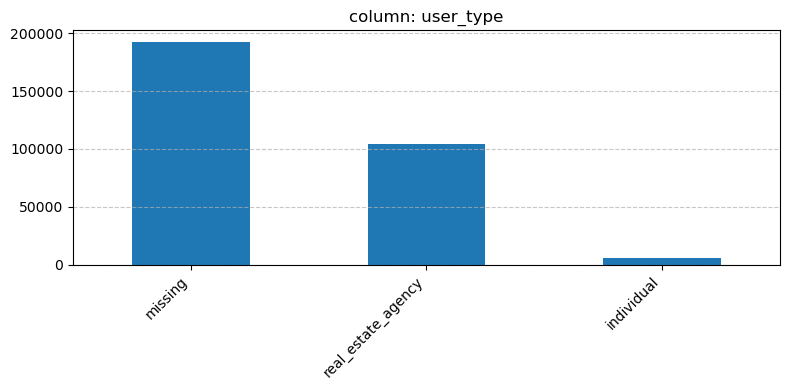

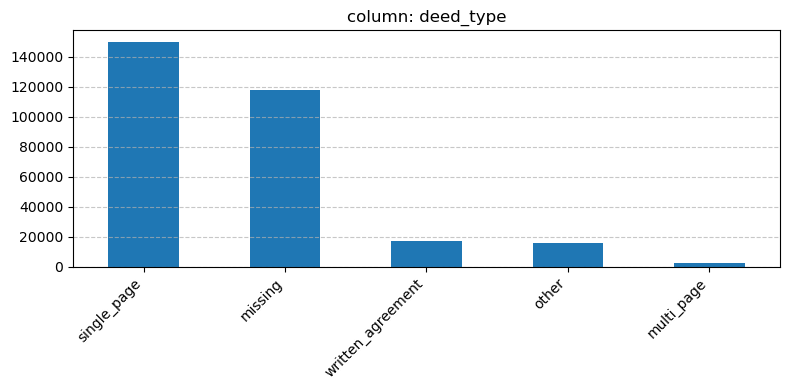

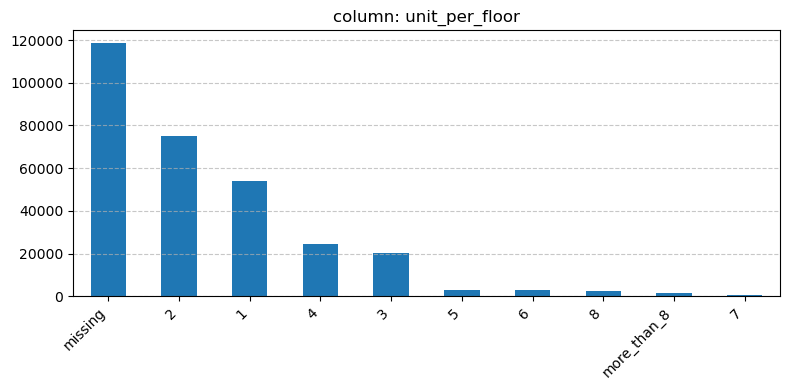

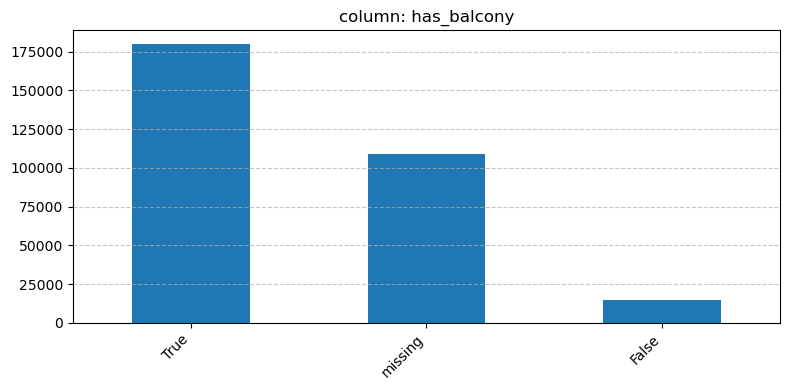

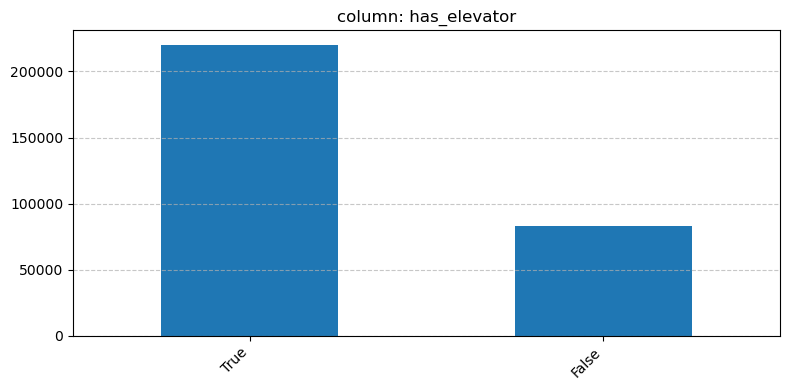

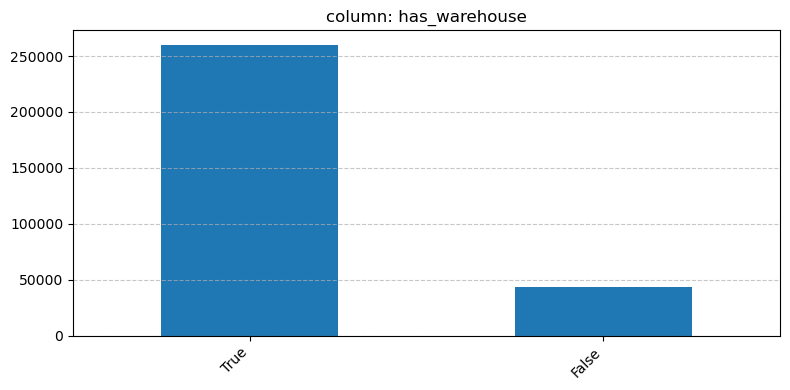

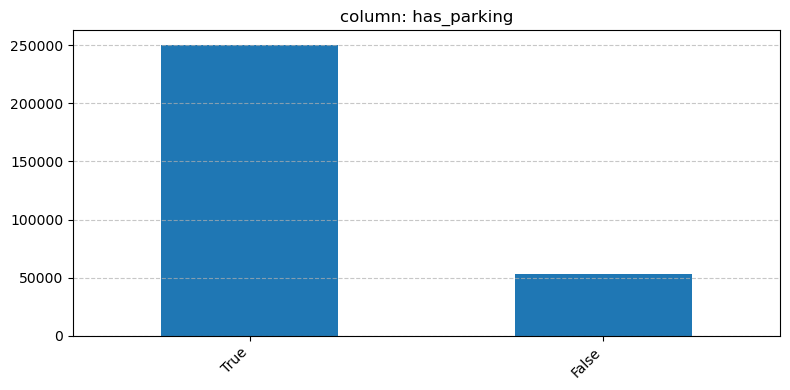

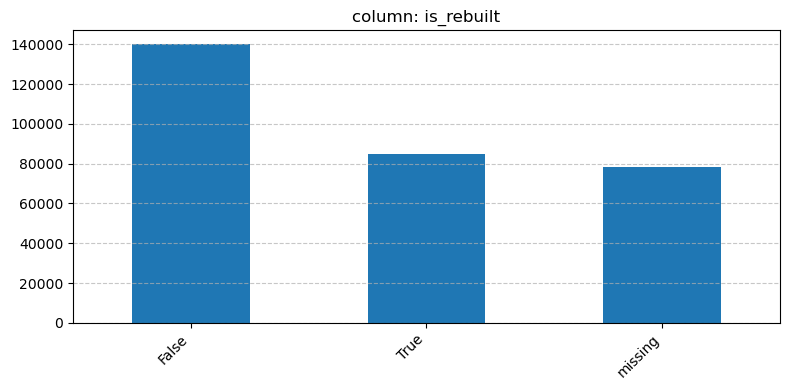

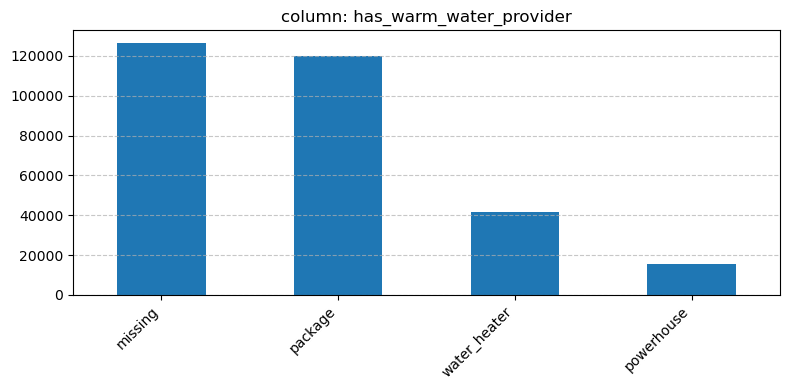

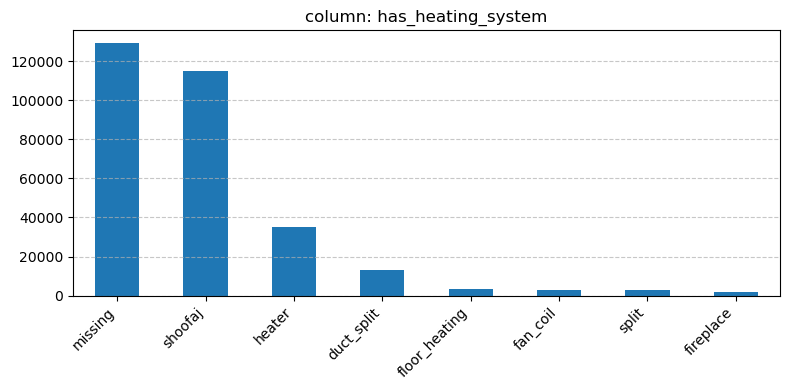

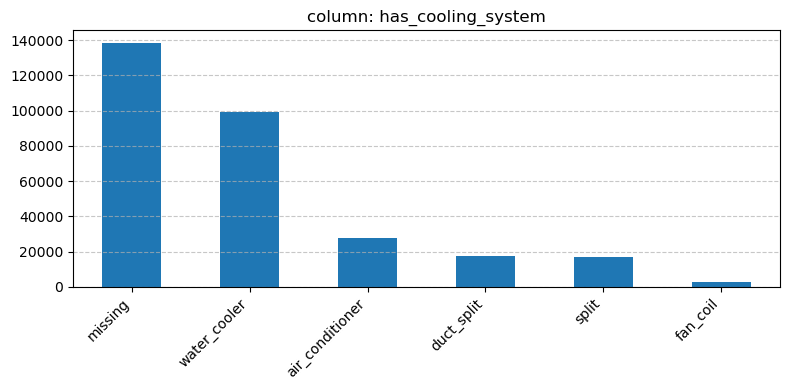

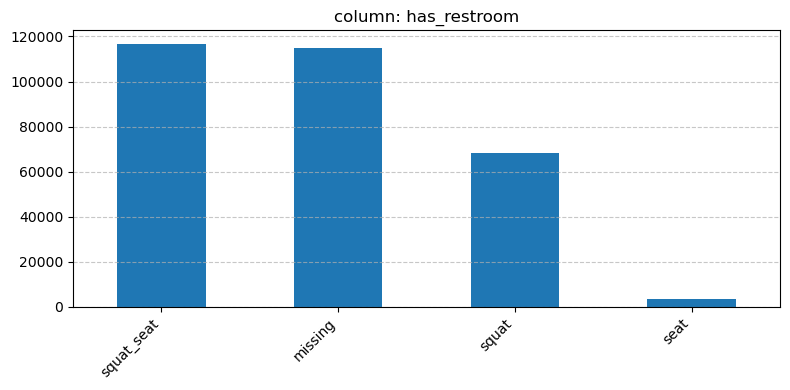

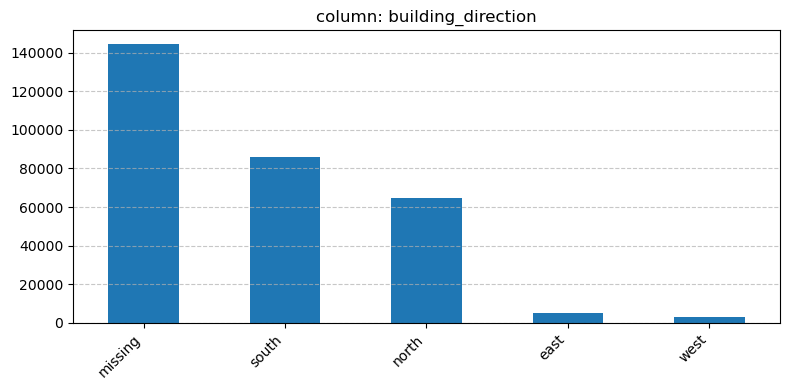

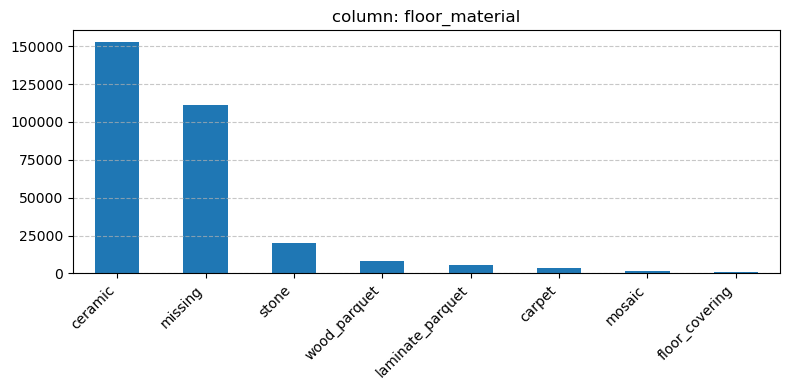

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض: df دیتافریم تو هست

# انتخاب ستون‌های متنی
object_cols = df.select_dtypes(include='category').columns

# حلقه روی هر ستون
for col in object_cols:
    # شمارش مقدارهای یکتا (با در نظر گرفتن NaN)
    counts = df[col].value_counts(dropna=False)

    # رسم نمودار
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title(f'column: {col}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [127]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [col for col in df.columns if df[col].dtype.name in ['object', 'category']]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [17]:
categorical_cols

NameError: name 'categorical_cols' is not defined

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303375 entries, 0 to 303374
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city_slug                303375 non-null  int32         
 1   created_at_month         303375 non-null  datetime64[ns]
 2   user_type                303375 non-null  int32         
 3   price_value              303375 non-null  float64       
 4   building_size            303375 non-null  float64       
 5   deed_type                303375 non-null  int32         
 6   floor                    303375 non-null  int64         
 7   rooms_count              303375 non-null  float64       
 8   total_floors_count       303375 non-null  int64         
 9   unit_per_floor           303375 non-null  int32         
 10  has_balcony              303375 non-null  int32         
 11  has_elevator             303375 non-null  int32         
 12  has_warehouse   

In [129]:
df['price_value'].sort_values(ascending=False).head(20)

35215    99999999999999.00
1956     90000000000000.00
169710   89000000000000.00
102669   83970000000000.00
117713   64000000000000.00
15595    60000000000000.00
63350    51500000000000.00
225353   45000000000000.00
16315    38000000000000.00
31956    36800000000000.00
120680   35000000000000.00
182895   31000000000000.00
83345    29000000000000.00
176839   29000000000000.00
111023   29000000000000.00
114805   27550000000000.00
41504    27000000000000.00
9388     26910000000000.00
301771   24000000000000.00
255029   23800000000000.00
Name: price_value, dtype: float64

In [132]:
def is_repeated_number(x):
    s = str(int(x))
    return len(set(s)) == 1

df=df[~df['price_value'].apply(lambda x: is_repeated_number(x))]


count           298107.00
mean       14766739059.96
std       462194331742.39
min                 10.00
25%         1950000000.00
50%         3350000000.00
75%         6400000000.00
max     90000000000000.00
Name: price_value, dtype: float64

تعداد نال: 0


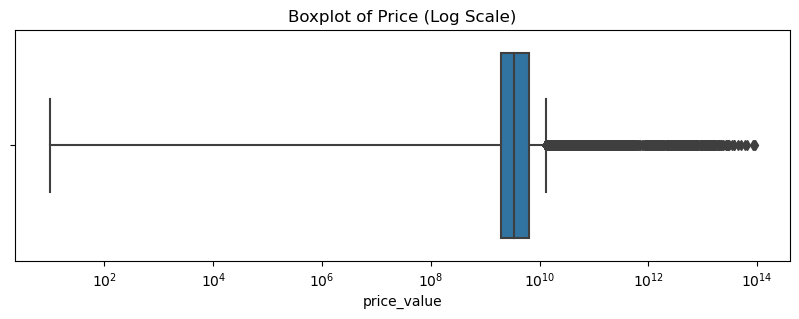


مرز بالایی بر اساس IQR: 13,075,000,000

مقادیر مشکوک که همه ارقامشون یکی هستند: []

تعداد ردیف‌های مشکوک: 26847

تعداد نهایی بعد از حذف اوتلایرها: 271260 سطر


In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df['price_value'].describe())
print("\nتعداد نال:", df['price_value'].isna().sum())

plt.figure(figsize=(10, 3))
sns.boxplot(x=df['price_value'])
plt.xscale('log')  # چون قیمت مقیاس بزرگ داره
plt.title('Boxplot of Price (Log Scale)')
plt.show()

q1 = df['price_value'].quantile(0.25)
q3 = df['price_value'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

print(f"\nمرز بالایی بر اساس IQR: {upper_bound:,.0f}")

def is_repeated_number(x):
    try:
        s = str(int(x))
        return len(set(s)) == 1
    except:
        return False

suspect_values = df[df['price_value'].apply(is_repeated_number)]['price_value'].unique()
print("\nمقادیر مشکوک که همه ارقامشون یکی هستند:", suspect_values)


condition_outliers = (df['price_value'] > upper_bound) | (df['price_value'].isin(suspect_values))

print(f"\nتعداد ردیف‌های مشکوک: {condition_outliers.sum()}")

df_clean = df[~condition_outliers].copy()

print(f"\nتعداد نهایی بعد از حذف اوتلایرها: {len(df_clean)} سطر")



In [134]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271260 entries, 0 to 303374
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city_slug                271260 non-null  int32         
 1   created_at_month         271260 non-null  datetime64[ns]
 2   user_type                271260 non-null  int32         
 3   price_value              271260 non-null  float64       
 4   building_size            271260 non-null  float64       
 5   deed_type                271260 non-null  int32         
 6   floor                    271260 non-null  int64         
 7   rooms_count              271260 non-null  float64       
 8   total_floors_count       271260 non-null  int64         
 9   unit_per_floor           271260 non-null  int32         
 10  has_balcony              271260 non-null  int32         
 11  has_elevator             271260 non-null  int32         
 12  has_warehouse   

In [118]:
categorical_cols

['city_slug',
 'user_type',
 'deed_type',
 'unit_per_floor',
 'has_balcony',
 'has_elevator',
 'has_warehouse',
 'has_parking',
 'is_rebuilt',
 'has_warm_water_provider',
 'has_heating_system',
 'has_cooling_system',
 'has_restroom',
 'building_direction',
 'floor_material']

In [137]:
df['price_value_log'] = np.log1p(df['price_value'])

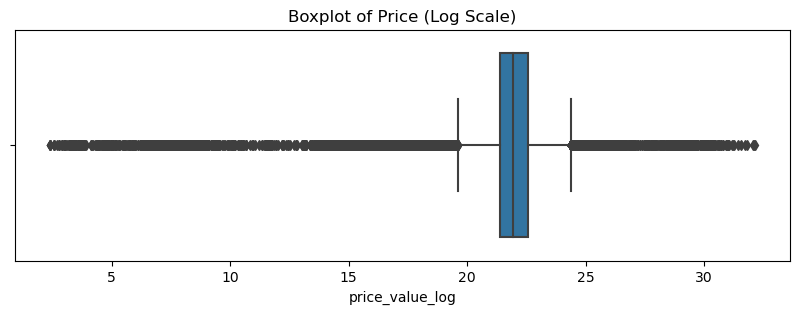

In [138]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['price_value_log'])
plt.title('Boxplot of Price (Log Scale)')
plt.show()

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(df.drop('price_value_log', axis=1),label=df['price_value_log'],categorical_feature=categorical_cols)
